In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_paths = ["Stacking_Predicted_AlGr1.25.xlsx", "Stacking_Predicted_AlGr1.5.xlsx","Stacking_Predicted_AlGr1.75.xlsx", "Stacking_Predicted_AlGr2.xlsx"]
dfs = [pd.read_excel(file) for file in file_paths]

In [3]:
df_list = [pd.read_excel(file, sheet_name="Sheet1") for file in file_paths]
df = pd.concat(df_list, ignore_index=True)

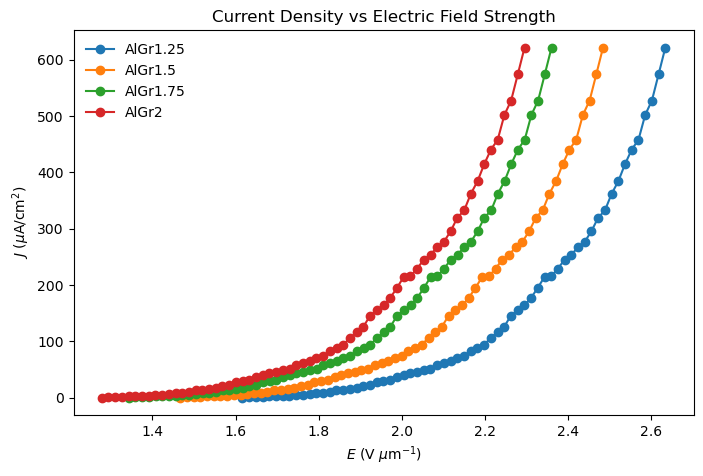

'Stacking_Electric_Field_vs_Current_Density.png'

In [14]:
plt.figure(figsize=(8, 5))

for file in file_paths:
    df = pd.read_excel(file, sheet_name="Sheet1")
    label = file.split("/")[-1].replace("Stacking_Predicted_", "").replace(".xlsx", "") 
    plt.plot(df["Electric Field Strength"], df["Current Density"], label=label, marker='o', linestyle='-')

plt.xlabel(r"$E$ (V $\mu$m$^{-1}$)")
plt.ylabel(r"$J$ ($\mu$A/cm$^2$)")
plt.title("Current Density vs Electric Field Strength")
plt.legend(frameon=True, framealpha=0)
#plt.grid()

plot_path = "Stacking_Electric_Field_vs_Current_Density.png"
plt.savefig(plot_path)
plt.show()

plot_path


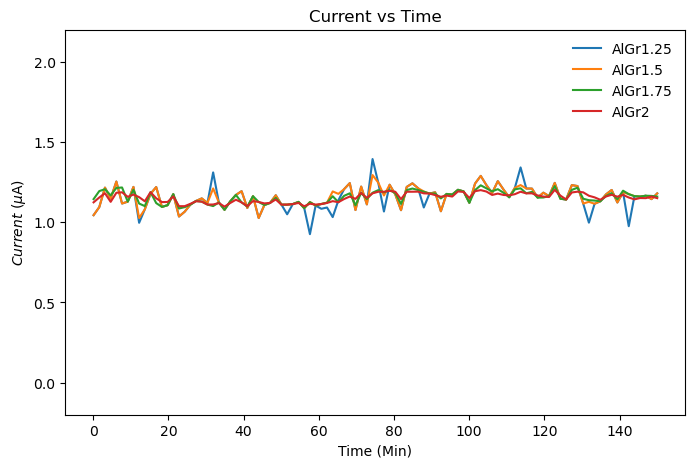

'Stacking_Predicted_Current_vs_Time_(Minutes).png'

In [5]:
plt.figure(figsize=(8, 5))

for file in file_paths:
    df = pd.read_excel(file, sheet_name="Sheet1")
    label = file.split("/")[-1].replace("Stacking_Predicted_", "").replace(".xlsx", "")
    plt.plot(df["Time (Minutes)"], df["Predicted Current (microAmperes)"], label=label, linestyle='-')

plt.xlabel("Time (Min)")
plt.ylabel(r"$Current$ ($\mu$A)")
plt.title("Current vs Time")
plt.legend(frameon=True, framealpha=0)
plt.ylim(-0.2, 2.2)
#plt.grid()

plot_path = "Stacking_Predicted_Current_vs_Time_(Minutes).png"
plt.savefig(plot_path)
plt.show()

plot_path


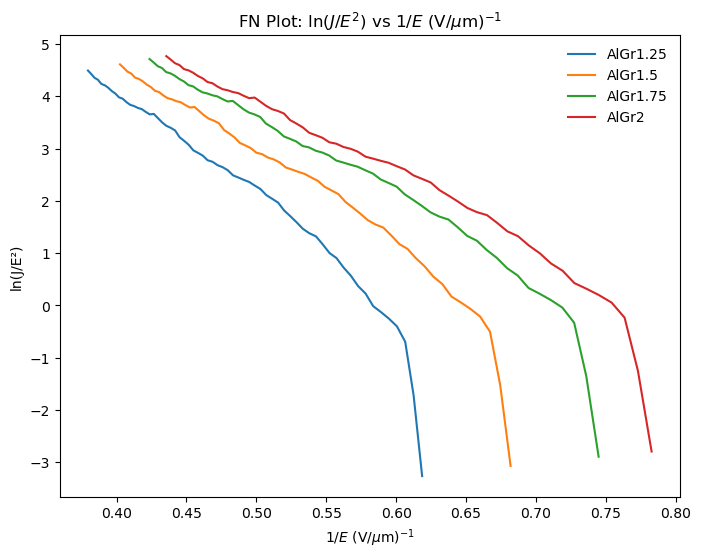

'Stacking_Predicted_FN_plots.png'

In [16]:
plt.figure(figsize=(8, 6))
for file_path in file_paths:
    df = pd.read_excel(file_path)
    
    E = df["Electric Field Strength"].values
    J = df["Current Density"].values
    
    ln_JE2 = np.log(J / (E**2))
    inv_E = 1 / E
    
    new_df = pd.DataFrame({"ln(J/E^2)": ln_JE2, "1/E": inv_E})
    output_file_path = file_path.replace(".xlsx", "_fn_plot_data.xlsx")
    new_df.to_excel(output_file_path, index=False)
    
    plt.plot(inv_E, ln_JE2, label=file_path.split("/")[-1].replace("Stacking_Predicted_", "").replace(".xlsx", ""))

plt.xlabel(r"$1/E$ (V/$\mu$m)$^{-1}$")
plt.ylabel("ln(J/E²)")
plt.legend(frameon=True, framealpha=0)
plt.title(r"FN Plot: $\ln(J/E^2)$ vs $1/E$ (V/$\mu$m)$^{-1}$")
#plt.grid()

plot_path3 = "Stacking_Predicted_FN_plots.png"
plt.savefig(plot_path3)
plt.show()
plot_path3